# Decision Tree Classification

## Lab Assignment - Iris Flower Classification

This exercise is understanding the decision tree classifier over the IRIS data set. 

Perform the following operations:

#### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

**BONUS Question - 0.5 mark**

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.
**BONUS Question - 1 mark**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

In [5]:
df.columns[0]

'sepal_length'

In [6]:
iris_setosa=df[df['flower']=='Iris-setosa']
iris_versicolor=df[df['flower']=='Iris-versicolor']
iris_virginica=df[df['flower']=='Iris-virginica']

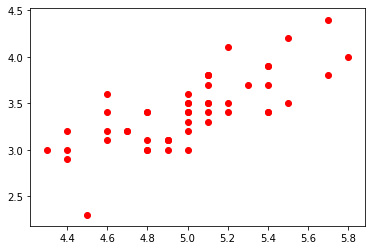

In [8]:
plt.scatter(iris_setosa['sepal_length'].values,iris_setosa['sepal_width'].values,color='r',label='iris_setosa')

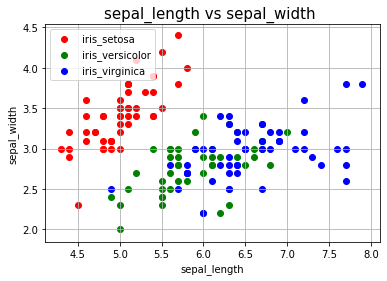

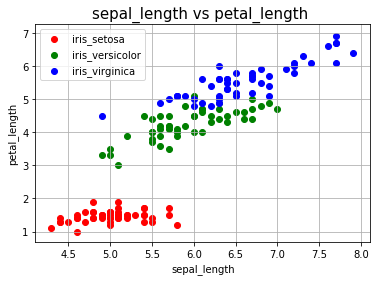

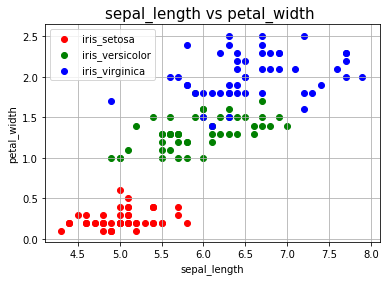

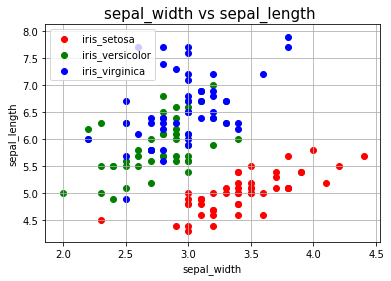

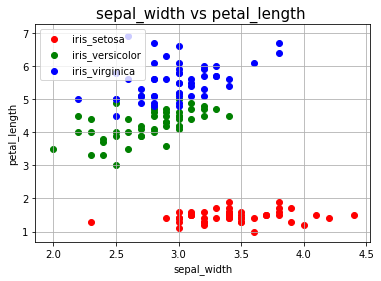

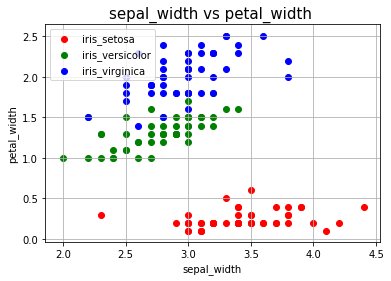

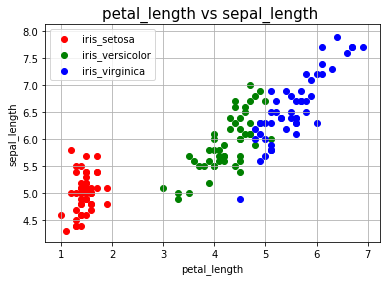

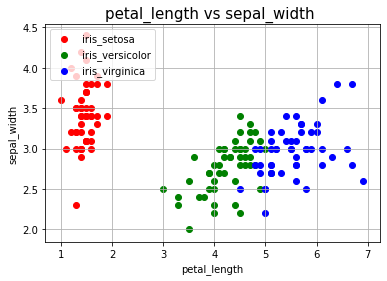

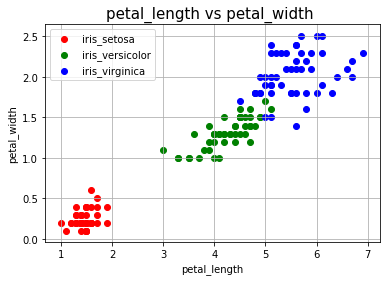

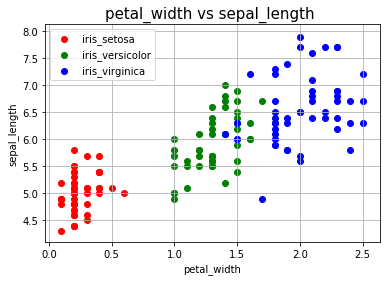

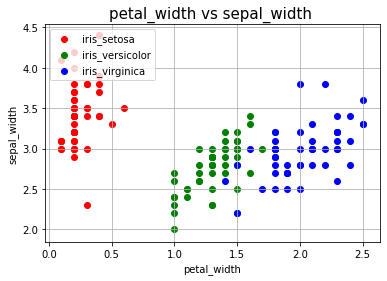

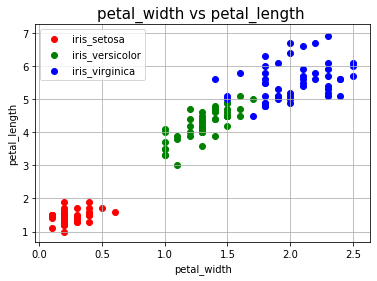

In [7]:
for y in range(4):
    for x in range(0,4):
        if y!=x:
            plt.figure()
            plt.scatter(iris_setosa[iris_setosa.columns[y]].values,iris_setosa[iris_setosa.columns[x]].values,color='r',label='iris_setosa')
            plt.scatter(iris_versicolor[iris_versicolor.columns[y]].values,iris_versicolor[iris_versicolor.columns[x]].values,color='g',label='iris_versicolor')
            plt.scatter(iris_virginica[iris_virginica.columns[y]].values,iris_virginica[iris_virginica.columns[x]].values,color='b',label='iris_virginica')
            plt.xlabel(df.columns[y])
            plt.ylabel(df.columns[x])
            plt.title('{0} vs {1} '.format(df.columns[y],df.columns[x]),fontsize='15')
            plt.grid()
            plt.legend(loc=2)

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


- The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.

In [9]:
map1={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['new_flower']=df['flower'].apply(lambda x: map1[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower,new_flower
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [10]:
x_train,x_test,y_train,y_test=train_test_split(df[['petal_length','petal_width']],df['new_flower'],test_size=0.2,random_state=3)

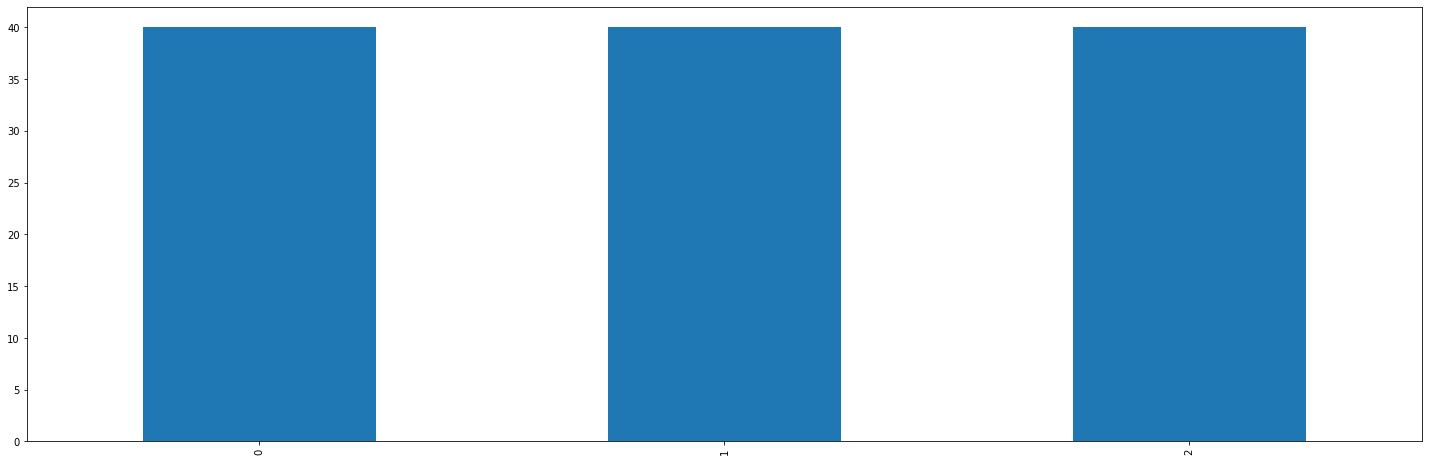

In [11]:
plt.figure(figsize=[25,8])
y_train.value_counts().sort_index().plot(kind='bar')

In [12]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(x_train,y_train)

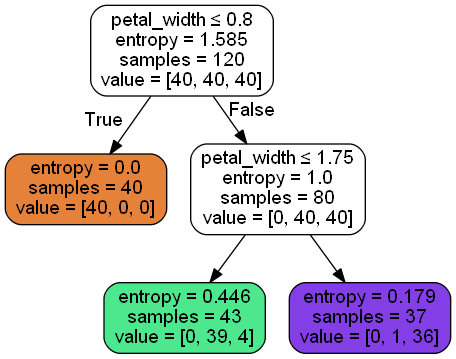

In [13]:
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=cols[2:-1],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

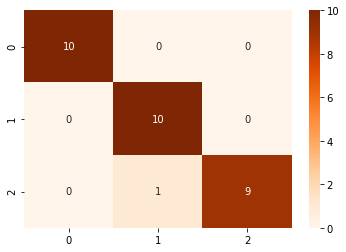

In [14]:
actual=y_test
pred=obtained_tree.predict(x_test)
import seaborn
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",xticklabels=decisiontree.classes_
               ,yticklabels=decisiontree.classes_)

In [15]:
obtained_tree.predict([[1.3,0.2]])

array([0], dtype=int64)

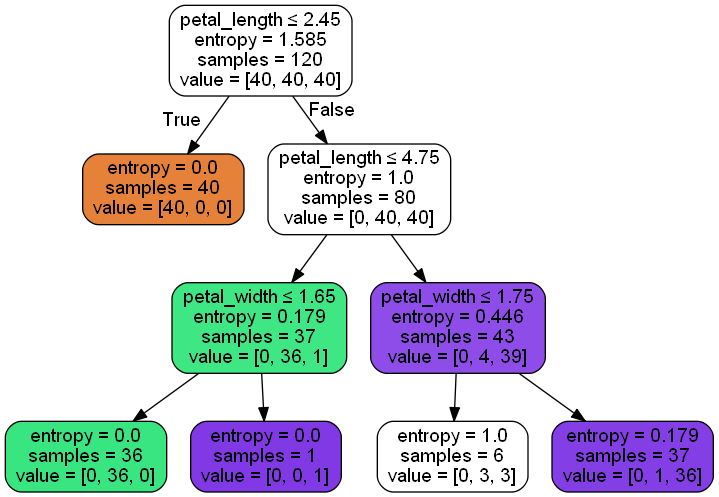

In [16]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(x_train,y_train)
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=cols[2:-1],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

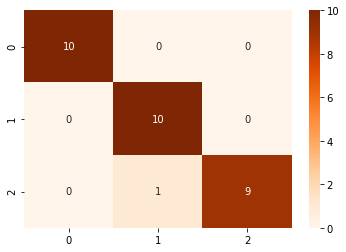

In [17]:
actual=y_test
pred=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",xticklabels=decisiontree.classes_
               ,yticklabels=decisiontree.classes_)

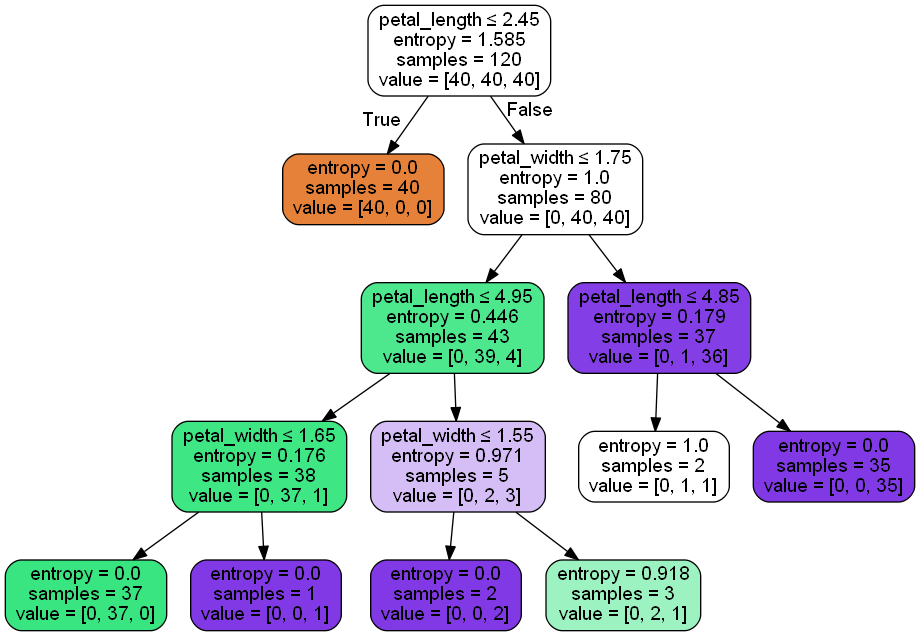

In [18]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree=decisiontree.fit(x_train,y_train)
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=cols[2:-1],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

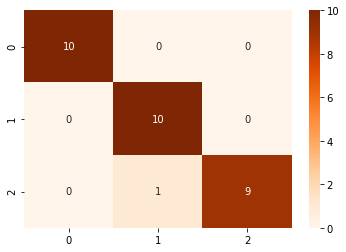

In [19]:
actual=y_test
pred=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",xticklabels=decisiontree.classes_
               ,yticklabels=decisiontree.classes_)

In [20]:
import sklearn
sklearn.__version__

'0.21.2'

[[0.   0.01 0.02 ... 6.97 6.98 6.99]
 [0.   0.01 0.02 ... 6.97 6.98 6.99]
 [0.   0.01 0.02 ... 6.97 6.98 6.99]
 ...
 [0.   0.01 0.02 ... 6.97 6.98 6.99]
 [0.   0.01 0.02 ... 6.97 6.98 6.99]
 [0.   0.01 0.02 ... 6.97 6.98 6.99]]
[0 0 0 ... 2 2 2]


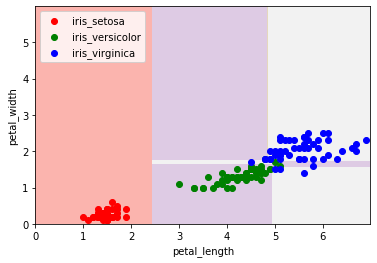

In [21]:
import numpy as np
x_min,x_max=0,7
y_min,y_max=0,6
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                 np.arange(y_min,y_max,0.01))
print(xx)
#print(yy)
xx_lin=xx.ravel()
#print(xx_lin)
yy_lin=yy.ravel()
#print(yy_lin)
pred_input=np.c_[xx_lin,yy_lin]
#print(pred_input)
z=obtained_tree.predict(pred_input)
print(z)
z=z.reshape(xx.shape)
#print(z)
#contourf fills the area. it requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(iris_setosa['petal_length'].values,iris_setosa['petal_width'].values,color='r',label='iris_setosa')
plt.scatter(iris_versicolor['petal_length'].values,iris_versicolor['petal_width'].values,color='g',label='iris_versicolor')
plt.scatter(iris_virginica['petal_length'].values,iris_virginica['petal_width'].values,color='b',label='iris_virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
#plt.title('petallength1 vs petalwidth1 '.fontsize='15')
plt.grid()
plt.legend(loc=2)
#plt.axis([0,8,0,8])
plt.grid()

- Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.¶

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df[['petal_length','petal_width']],df['new_flower'],test_size=0.2,random_state=9032)

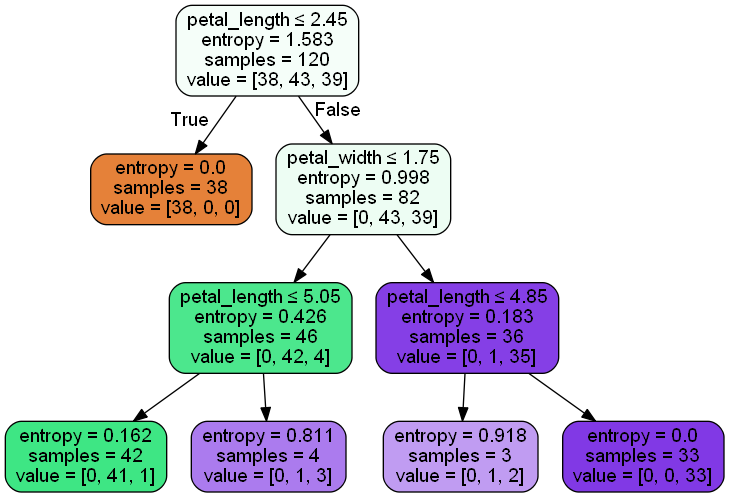

In [23]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(x_train,y_train)
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=cols[2:-1],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

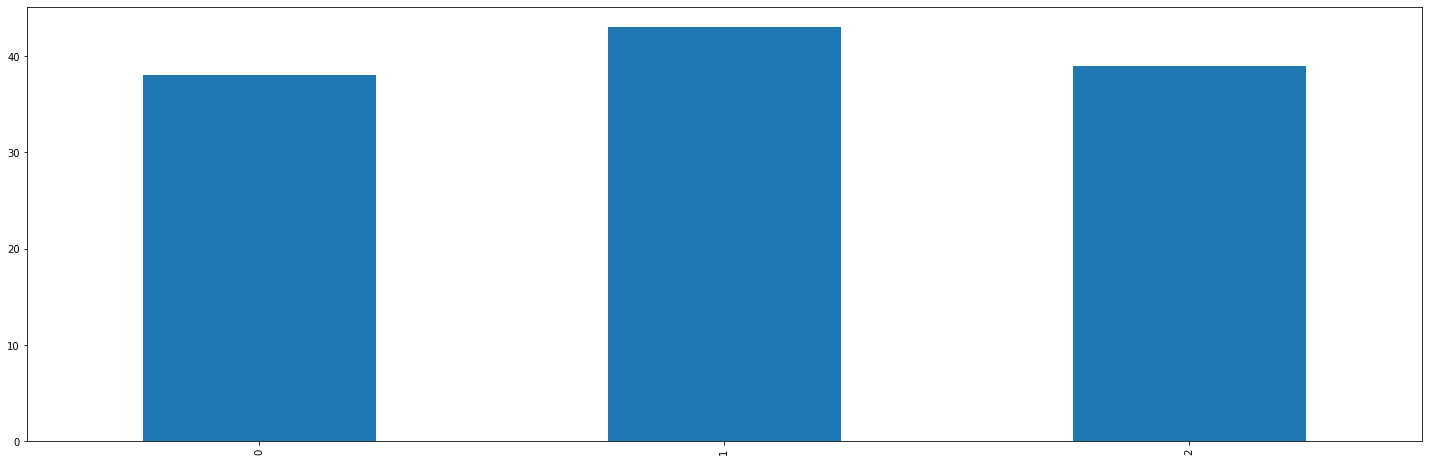

In [24]:
plt.figure(figsize=[25,8])
y_train.value_counts().sort_index().plot(kind='bar')

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df[['petal_length','petal_width']],df['new_flower'],test_size=0.2,random_state=3)

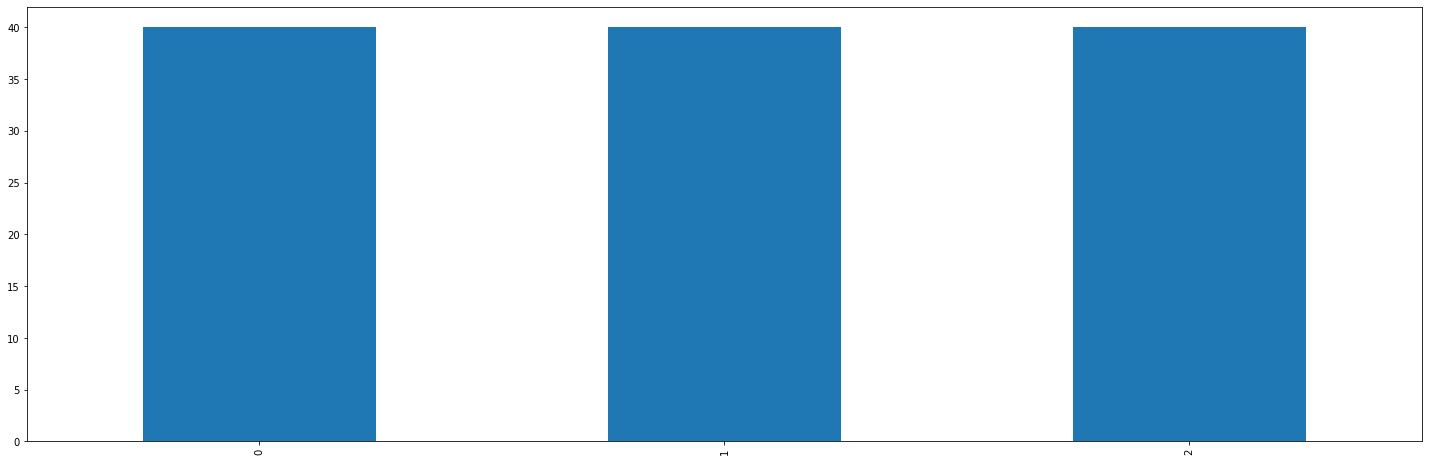

In [26]:
plt.figure(figsize=[25,8])
y_train.value_counts().sort_index().plot(kind='bar')

In [19]:
df[['petal_length']].shape

(150, 1)

In [24]:
sepal_length=iris_setosa[['sepal_length']].values
sepal_width=iris_setosa.iloc[:,1].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
sepal_length_train,sepal_length_test,sepal_width_train,sepal_width_test=train_test_split(sepal_length,sepal_width,random_state=0,test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(sepal_length_train,sepal_width_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

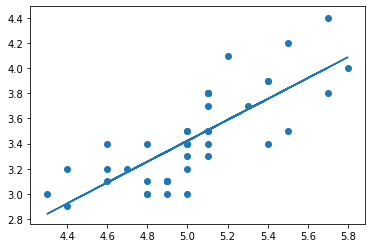

In [29]:
plt.scatter(sepal_length_train,sepal_width_train)
plt.plot(sepal_length_train,regressor.predict(sepal_length_train))